# Multiturn injection analysis

In [3]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import proplot as pplt
import psdist as ps
import psdist.visualization as psv
import yaml
from ipywidgets import interact
from ipywidgets import widgets
from omegaconf import OmegaConf
from omegaconf import DictConfig
from pprint import pprint

In [4]:
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "viridis"
pplt.rc["cycle"] = "538"
pplt.rc["grid"] = False
pplt.rc["figure.facecolor"] = "white"

## Setup

In [5]:
timestamp = None
script_name = "paint_root"

if timestamp is None:
    input_dirs = os.listdir(f"./outputs/{script_name}")
    input_dirs = sorted(input_dirs)
    input_dir = input_dirs[-1]
    input_dir = os.path.join(f"./outputs/{script_name}", input_dir)
else:
    input_dir = f"./outputs/{script_name}/{timestamp}/"

print("intput_dir = ", input_dir)

intput_dir =  ./outputs/paint_root/240517144842


In [6]:
cfg_path = os.path.join(input_dir, "config/config.yaml")
cfg = yaml.safe_load(open(cfg_path, "r"))
cfg = DictConfig(cfg)

print("config:")
print(OmegaConf.to_yaml(cfg))

config:
timestamp: ${now:%y%m%d%H%M%S}
bunch:
  mass: 0.93827231
  energy: 0.8
lattice:
  path: ./lattice/sns_ring_nux6.175_nuy6.175_sol.lattice
  seq: rnginjsol
  apertures: false
  foil: false
  fringe: true
  impedance:
    xy: false
    z: false
  spacecharge:
    xy: false
    z: false
  rf: false
  solenoid: true
foil:
  thickness: 390.0
  scatter: full
  parent_index: 0
impedance:
  xy:
    n_bins: 64
    use_x: false
    use_y: true
    alpha_x: 0.0
    alpha_y: -0.004
    beta_x: 10.191
    beta_y: 10.447
    tune_x: 6.21991
    tune_y: 6.20936
  z:
    n_macros_min: 1000
    n_bins: 128
inj:
  intensity: 225800000000.0
  x:
    order: 9
    alpha: 0.064
    beta: 10.056
    eps: 2.21e-07
    pos: 0.0486
    mom: 0.0
  'y':
    order: 9
    alpha: 0.063
    beta: 10.815
    eps: 2.21e-07
    pos: 0.046
    mom: 0.0
  z:
    fill_fraction: 139.68
    tail_fraction: 0.0
    energy:
      sigma: 0.0005
      trunc: 1.0
      min: -0.0025
      max: 0.0025
      centroid:
        

In [7]:
cycle_colors = pplt.Cycle(pplt.rc["cycle"]).by_key()["color"]

## Scalars

In [8]:
history = pd.read_csv(os.path.join(input_dir, "history.dat"))
history.head()

,size,gamma,beta,energy,x_rms,y_rms,z_rms,x_min,x_max,y_min,...,cov_2-4,cov_3-4,cov_4-4,cov_0-5,cov_1-5,cov_2-5,cov_3-5,cov_4-5,cov_5-5,runtim
0,10,1.852631,0.841811,0.8,0.001633,0.001003,87.983044,0.046012,0.051436,0.044849,...,-0.033810,0.008092,7741.016104,-2.962188e-07,5.670889e-08,1.942874e-07,3.709525e-08,0.008590,3.554322e-07,0.000451
1,20,1.852631,0.841811,0.8,0.001607,0.001832,85.275604,0.045014,0.051309,0.043749,...,0.063943,0.002435,7271.928613,1.530926e-07,2.358469e-08,-4.639265e-08,1.006094e-08,0.005496,2.529642e-07,0.011085
2,30,1.852631,0.841811,0.8,0.001856,0.001201,82.601343,0.043807,0.052273,0.043636,...,0.021953,-0.002962,6822.981892,9.265316e-08,1.549010e-08,6.285072e-08,2.091965e-08,0.001052,2.504191e-07,0.022785
3,40,1.852631,0.841811,0.8,0.001635,0.001693,81.926323,0.044199,0.050693,0.042845,...,-0.010535,-0.002296,6711.922432,2.047187e-07,8.695326e-09,1.467288e-07,-6.360681e-09,-0.003528,2.355374e-07,0.033778
4,50,1.852631,0.841811,0.8,0.002007,0.001672,77.323593,0.044086,0.052646,0.042518,...,-0.015190,-0.000414,5978.938073,1.810609e-07,-1.249377e-08,-1.105281e-07,-1.512218e-08,-0.001645,2.341336e-07,0.044710


In [9]:
pprint(list(history.keys()))

['size',
 'gamma',
 'beta',
 'energy',
 'x_rms',
 'y_rms',
 'z_rms',
 'x_min',
 'x_max',
 'y_min',
 'y_max',
 'z_min',
 'z_max',
 'eps_x',
 'eps_y',
 'eps_z',
 'eps_1',
 'eps_2',
 'mean_0',
 'mean_1',
 'mean_2',
 'mean_3',
 'mean_4',
 'mean_5',
 'cov_0-0',
 'cov_0-1',
 'cov_1-1',
 'cov_0-2',
 'cov_1-2',
 'cov_2-2',
 'cov_0-3',
 'cov_1-3',
 'cov_2-3',
 'cov_3-3',
 'cov_0-4',
 'cov_1-4',
 'cov_2-4',
 'cov_3-4',
 'cov_4-4',
 'cov_0-5',
 'cov_1-5',
 'cov_2-5',
 'cov_3-5',
 'cov_4-5',
 'cov_5-5',
 'runtim']


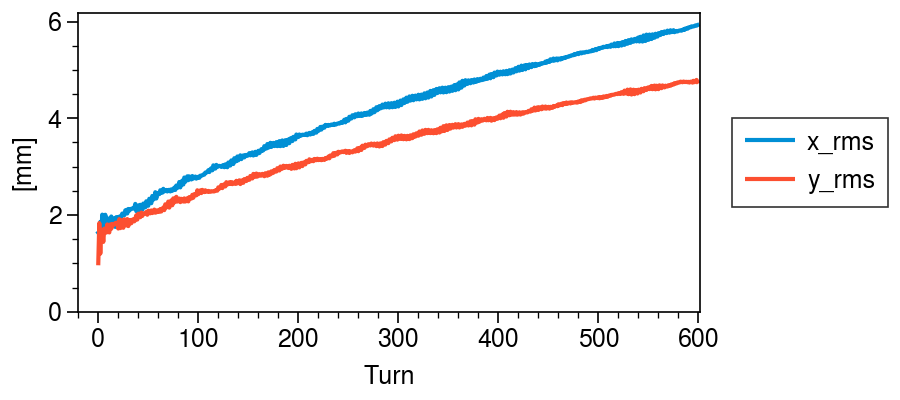

In [10]:
fig, ax = pplt.subplots(figsize=(4.5, 2.0))
for key in ["x_rms", "y_rms"]:
    ax.plot(history[key].values * 1000.0, label=key)
ax.legend(loc="r", ncols=1)
ax.format(xlabel="Turn", ylabel="[mm]", ymin=0.0)
ax.format(xmin=-20, xmax=(history.shape[0] + 1))

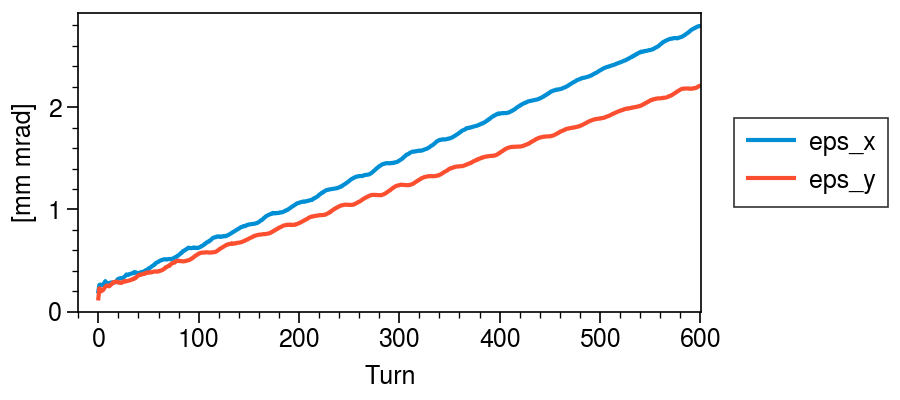

In [11]:
fig, ax = pplt.subplots(figsize=(4.5, 2.0))
for key in ["eps_x", "eps_y"]:
    ax.plot(history[key].values * 1.00e+06, label=key)
ax.legend(loc="r", ncols=1)
ax.format(xlabel="Turn", ylabel="[mm mrad]", ymin=0.0)
ax.format(xmin=-20, xmax=(history.shape[0] + 1))

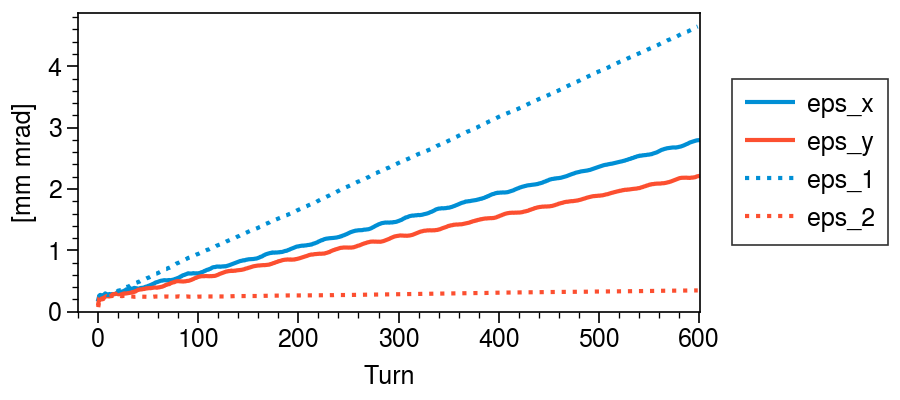

In [12]:
fig, ax = pplt.subplots(figsize=(4.5, 2.0))
for i, key in enumerate(["eps_x", "eps_y"]):
    ax.plot(history[key].values * 1.00e+06, label=key, color=cycle_colors[i])
for i, key in enumerate(["eps_1", "eps_2"]):
    ax.plot(history[key].values * 1.00e+06, label=key, color=cycle_colors[i], ls=":")
ax.legend(loc="r", ncols=1)
ax.format(xlabel="Turn", ylabel="[mm mrad]", ymin=0.0)
ax.format(xmin=-20, xmax=(history.shape[0] + 1))

## Tunes

In [13]:
# [...]

## Phase space distribution

In [14]:
bunch_filenames = os.listdir(input_dir)
bunch_filenames = sorted(bunch_filenames)
bunch_filenames = [f for f in bunch_filenames if f.startswith("bunch")]
bunch_filenames = [os.path.join(input_dir, f) for f in bunch_filenames]

bunches = []
bunch_turns = []
for filename in bunch_filenames:
    X = np.loadtxt(filename, comments="%", usecols=range(6))
    X[:, :4] *= 1000.0
    X[:, 5] *= 1000.0
    X = X - np.mean(X, axis=0)
    bunches.append(X)

    turn = int(filename.split("_")[-1].split(".dat")[0])
    bunch_turns.append(turn)

In [15]:
dims = ["x", "xp", "y", "yp", "z", "dE"]
units = ["mm", "mrad", "mm", "mrad", "m", "MeV"]
labels = [f"{dim} [{unit}]" for dim, unit in zip(dims, units)]
limits = ps.points.limits(bunches[-1], zero_center=True, share=[(0, 2), (1, 3)], pad=0.25)

### Interactive 2D projections

In [16]:
@interact(
    dim1=widgets.Dropdown(options=dims, value=dims[0]),
    dim2=widgets.Dropdown(options=dims, value=dims[1]),
    index=widgets.IntSlider(min=0, max=(len(bunches) - 1), value=0),
    bins=widgets.IntSlider(min=32, max=128, value=64),
)
def update(dim1: str, dim2: str, index: int, bins: int):
    if dim1 == dim2:
        return

    axis = [dims.index(dim) for dim in [dim1, dim2]]
    axis = tuple(axis)
    
    X = bunches[index]

    fig, ax = pplt.subplots()
    ax.hist2d(
        X[:, axis[0]], 
        X[:, axis[1]], 
        bins=bins,
        range=[limits[axis[0]], limits[axis[1]]],
    )
    ax.format(xlabel=labels[axis[0]], ylabel=labels[axis[1]])
    ax.format(title=f"turn = {bunch_turns[index]}")

    paxs = [ax.panel_axes(loc) for loc in ["top", "right"]]
    for pax in paxs:
        pax.format(xspineloc="bottom", yspineloc="left")
    kws = dict(bins=bins, density=False, color="black", histtype="step", lw=1.25)
    paxs[0].hist( X[:, axis[0]], range=limits[axis[0]], **kws)
    paxs[1].histh(X[:, axis[1]], range=limits[axis[1]], **kws)
    plt.show()

interactive(children=(Dropdown(description='dim1', options=('x', 'xp', 'y', 'yp', 'z', 'dE'), value='x'), Drop…

### Interactive corner

In [17]:
@interact(
    ndim=widgets.BoundedIntText(min=4, max=6, value=4),
    index=widgets.IntSlider(min=0, max=(len(bunches) - 1), value=0),
    bins=widgets.IntSlider(min=32, max=128, value=42),
    ellipse=False,
)
def update(ndim: int, index: int, bins: int, ellipse: bool):    
    X = bunches[index][:, :ndim]
    
    grid = psv.CornerGrid(ndim, diag_shrink=0.85)
    grid.plot_points(
        X,
        bins=bins,
        limits=limits,
        mask=False,
        rms_ellipse=ellipse,
        rms_ellipse_kws=dict(level=2.0, color="white"),
    )
    grid.set_labels(labels)
    grid.axs.format(suptitle=f"Turn = {bunch_turns[index]}")
    plt.show()

interactive(children=(BoundedIntText(value=4, description='ndim', max=6, min=4), IntSlider(value=0, descriptio…